# **Instalar el Framework DEAP**

In [13]:
%pip install deap

Note: you may need to restart the kernel to use updated packages.


# Importar librerías

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools, algorithms

#Advertencias
import warnings
warnings.filterwarnings('ignore')

# Ejercicio de la mochila

In [15]:
#Definir pesos, beneficios y capacidad
pesos = [20, 25, 20, 20, 35, 40, 35, 30, 35, 25]
beneficios = [50, 35, 45, 20, 35, 40, 50, 50, 45, 40]
capacidad = 120

Función de adaptabilidad

In [16]:
def evaluar_beneficio (individuo):
    beneficio = 0.0
    peso = 0.0
    beneficio = np.dot(individuo, beneficios)
    peso = np.dot(individuo, pesos)

    if peso > capacidad:
        beneficio = beneficio - peso
    
    return beneficio,

# Declarar los artefactos genéticos

In [17]:
#Contenedor de las operaciones genéticas
toolbox = base.Toolbox()

In [18]:
#Habilitar la clase función de adaptabilidad y la clase individuo
creator.create('FitnessMax', base.Fitness, weights = (1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

In [19]:
#Declarar el gen, el tipo de individuo y la población
toolbox.register('attribute', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 10)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [20]:
#Confirmar el individuo y la población
ind = toolbox.individual()
print(f'Individuo: {ind}')
pop = toolbox.population(n = 10)
print(f'Población: {pop}')

Individuo: [1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
Población: [[1, 1, 1, 0, 1, 1, 1, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 1, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]]


In [21]:
#C0nfirmar funcionamiento de la función de adaptabilidad
ind = toolbox.individual()
print(f'Individuo a evaluar: {ind}\n¿Ha pasado por la función? {ind.fitness.valid}')
ind.fitness.values = evaluar_beneficio(ind)
print(f'¿Ha pasado por la función? {ind.fitness.valid}\nValor de adaptabilidad: {ind.fitness}')


Individuo a evaluar: [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
¿Ha pasado por la función? False
¿Ha pasado por la función? True
Valor de adaptabilidad: (110.0,)


Crear las operaciones genéticas

1. Selección Competitiva

In [22]:
toolbox.register('evaluate', evaluar_beneficio)
toolbox.register('select', tools.selBest)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.1)

Configuración de estadísticas

In [23]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Promedio', np.mean)
stats.register('Desviación Estándar', np.std)
stats.register('Mínimo', np.min)
stats.register('Máximo', np.max)

Proceso generacional

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	512   	97.2852 	42.5615            	25    	200   
1  	512   	97.7246 	41.802             	20    	195   
2  	512   	98.916  	42.756             	0     	205   
3  	512   	98.6719 	43.7555            	0     	205   
4  	512   	101.299 	42.5301            	0     	205   
5  	512   	96.8848 	41.1791            	0     	205   
6  	512   	96.0352 	42.393             	0     	205   
7  	512   	96.3477 	42.7251            	0     	205   
8  	512   	98.0957 	44.3126            	0     	205   
9  	512   	96.4355 	42.9371            	0     	205   
10 	512   	95.0098 	43.7818            	0     	205   
11 	512   	97.4414 	42.9821            	10    	220   
12 	512   	97.627  	44.4441            	10    	220   
13 	512   	97.5391 	45.2305            	0     	220   
14 	512   	97.4512 	45.6859            	0     	205   
15 	512   	96.1426 	45.1929            	0     	220   
16 	512   	97.998  	45.124             	0     	220   
17 	512   	100.107 	46.1542 

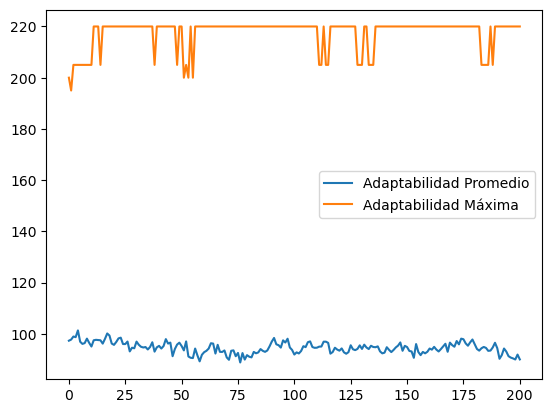

El individuo que presenta el mayor beneficio es: [1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
La adaptabilidad del mejor individuo es: (220,)


In [24]:
population = toolbox.population(n = 512)
population, logbook = algorithms.eaSimple(population, toolbox, 
                                          cxpb = 1, mutpb = 0.2, 
                                          ngen = 200, stats = stats)
print(f'El resultado de la evolución es: \n{logbook}')
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_beneficio(tools.selBest(population, 1)[0])}')


2. Selección Truncada

In [25]:
toolbox.register('evaluate', evaluar_beneficio)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.1)

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	512   	94.6094 	41.2387            	10    	220   
1  	512   	109.492 	42.6289            	15    	205   
2  	512   	119.912 	43.2408            	35    	220   
3  	512   	132.49  	45.3448            	25    	220   
4  	512   	142.998 	42.9883            	40    	220   
5  	512   	147.842 	44.3341            	35    	220   
6  	512   	161.426 	42.6104            	45    	220   
7  	512   	168.428 	43.8271            	50    	220   
8  	512   	178.516 	42.7205            	55    	220   
9  	512   	189.453 	39.1673            	55    	220   
10 	512   	192.217 	41.7128            	70    	220   
11 	512   	201.289 	37.9594            	45    	220   
12 	512   	206.279 	35.424             	35    	220   
13 	512   	206.67  	34.6888            	75    	220   
14 	512   	208.467 	32.9601            	60    	220   
15 	512   	206.123 	35.3396            	70    	220   
16 	512   	208.281 	32.4184            	70    	220   
17 	512   	207.9   	34.3073 

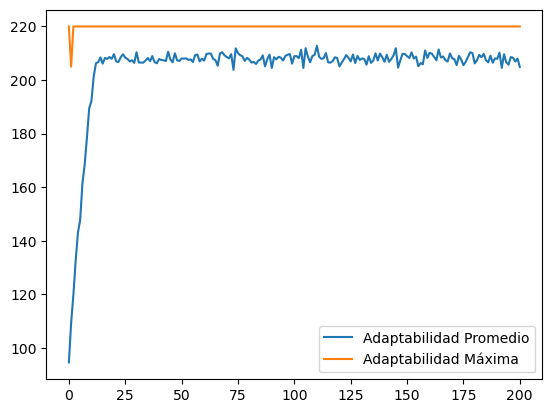

El individuo que presenta el mayor beneficio es: [1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
La adaptabilidad del mejor individuo es: (220,)


In [26]:
population = toolbox.population(n = 512)
population, logbook = algorithms.eaSimple(population, toolbox, 
                                          cxpb = 1, mutpb = 0.2, 
                                          ngen = 200, stats = stats)
print(f'El resultado de la evolución es: \n{logbook}')
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_beneficio(tools.selBest(population, 1)[0])}')


# **Optimización de Portafolios**

Encontrar la cantidad optimizada de acciones de un conjunto de activos que maximicen la rentabilidad y minimicen el riesgo

# Librerías

In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
from deap import base, creator, tools, algorithms

Tipo de información en Yahoo Finance

In [28]:
#Activos
stocks = ['AAPL', 'AMZN', 'COKE', 'GOOG']
#Índices
index = ['^DJI', '^IXIC', '^GSPC']
#Commodities
commodities = ['BZ=F', 'GC=F', 'SI=F']
#Monedas
coin = ['COP=X', 'MXN=X', 'BRL=X']

In [29]:
yf.download('NVDA', start = '2020-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.972160,5.972160,5.892751,5.943284,237536000
2020-01-03,5.876572,5.920384,5.827532,5.852425,205384000
2020-01-06,5.901214,5.906442,5.757082,5.783220,262636000
2020-01-07,5.972660,6.018463,5.884537,5.929594,314856000
2020-01-08,5.983862,6.025185,5.928350,5.968428,277108000
...,...,...,...,...,...
2025-03-24,121.410004,122.220001,119.339996,119.879997,228452500
2025-03-25,120.690002,121.290001,118.919998,120.550003,167447200


In [30]:
nvda = yf.Ticker('NVDA')
nvda

yfinance.Ticker object <NVDA>

In [31]:
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '(408) 486-2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment comprises Data Center computing platforms and end-to-end networking platforms, including Quantum for InfiniBand and Spectrum for Ethernet; NVIDIA DRIVE automated-driving platform and automotive development agreements; Jetson robotics and other embedded platforms; NVIDIA AI Enterprise and other software; and DGX Cloud software and services. The Graphics segment offers GeFor

In [38]:
print(f'{nvda.info['marketCap']:0,.2f}')

2,675,947,864,064.00


In [33]:
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,13800000000.0
Ordinary Shares Number,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Share Issued,24477000000.0,24640000000.0,24661365720.0,25060000000.0,NaN
Net Debt,NaN,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,10270000000.0,11056000000.0,12031000000.0,11831000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,43210000000.0,25984000000.0,13296000000.0,21208000000.0,NaN
Other Short Term Investments,34621000000.0,18704000000.0,9907000000.0,19218000000.0,NaN


In [39]:
data = pd.DataFrame()
for t in stocks:
    data[t] = yf.download(t, start = '2020-01-01')['Close']
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AMZN,COKE,GOOG
Date,,,,
2020-01-02,72.716072,94.900497,270.641418,68.046204
2020-01-03,72.009125,93.748497,273.861603,67.712288
2020-01-06,72.582886,95.143997,270.267670,69.381874
2020-01-07,72.241562,95.343002,267.536438,69.338577
2020-01-08,73.403641,94.598503,265.715424,69.884995
...,...,...,...,...
2025-03-24,220.729996,203.259995,1285.000000,169.929993
2025-03-25,223.750000,205.710007,1297.180054,172.789993
2025-03-26,221.529999,201.130005,1298.930054,167.139999


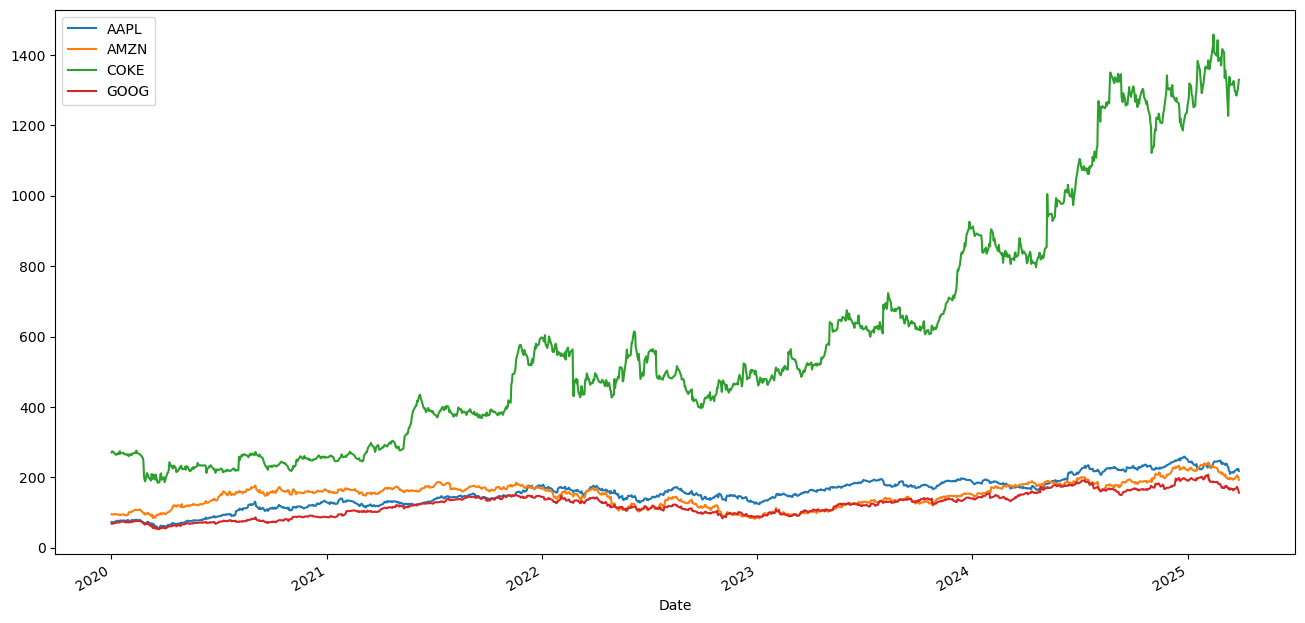

In [40]:
data.plot(figsize = (16, 8))
plt.show()

# Retornos simples y logarítmicos

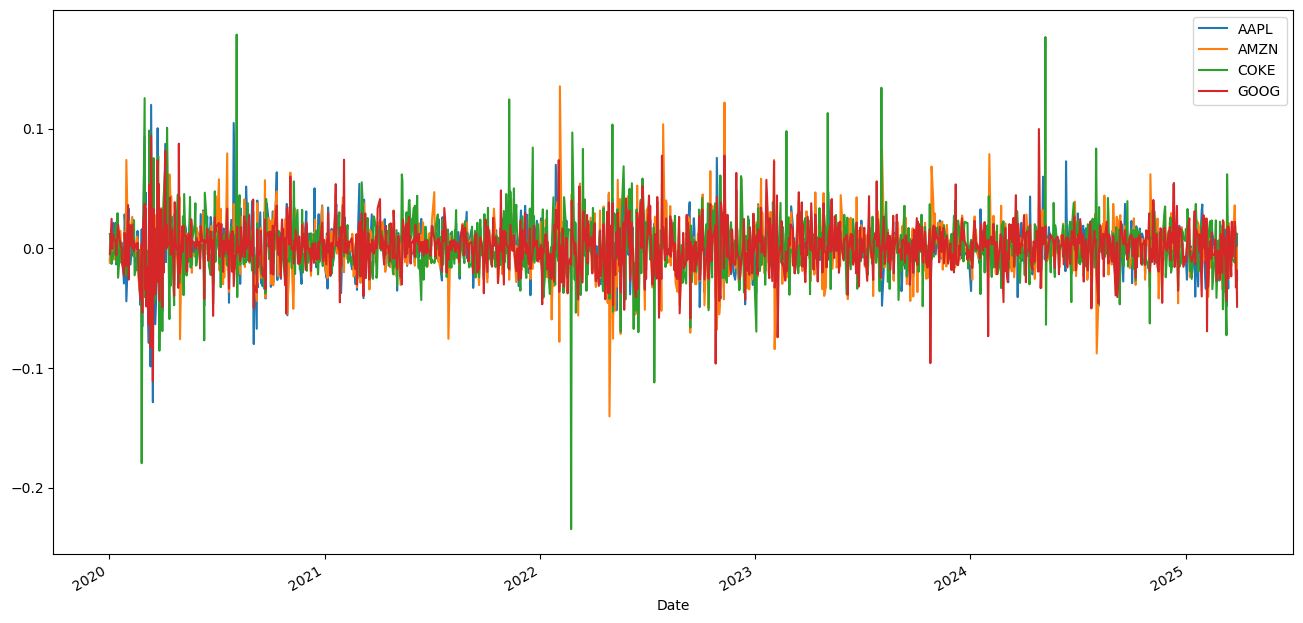

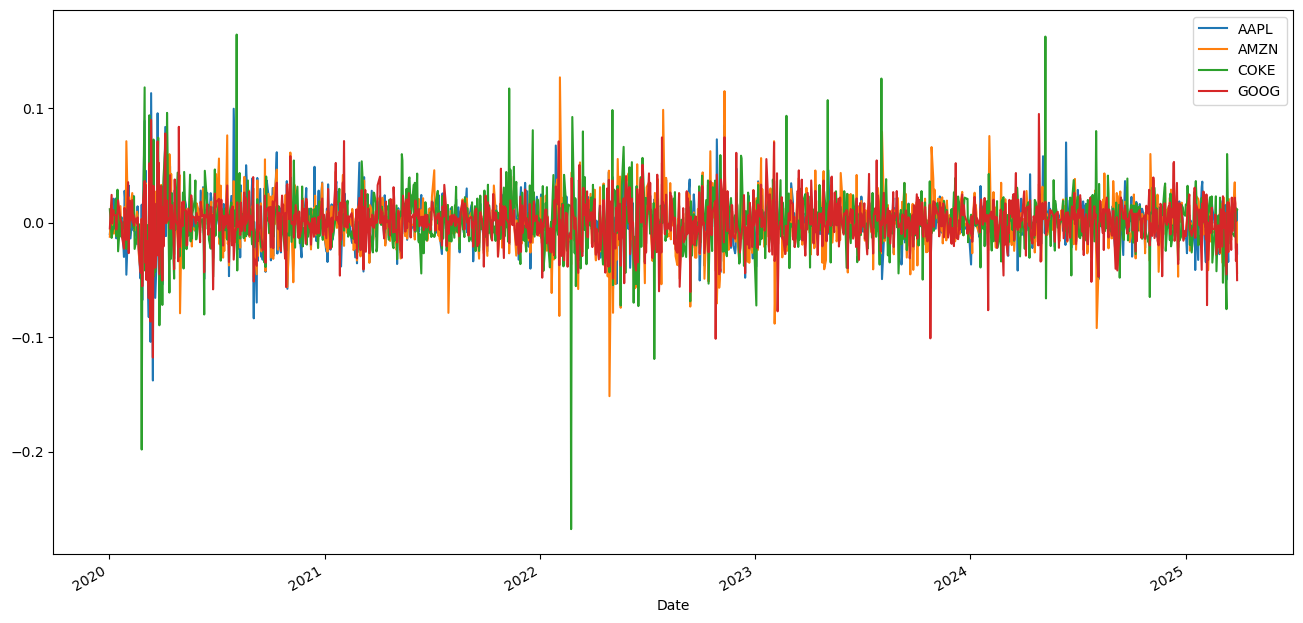

In [41]:
retorno_simple_diario = data.pct_change().dropna()
retorno_log_diario = np.log(data/data.shift(1)).dropna()
retorno_simple_diario.plot(figsize = (16, 8))
retorno_log_diario.plot(figsize = (16, 8))
plt.show()

# Implementación del algoritmo evolutivo

Capacidad de activos 5000

In [42]:
#Función de adaptabilidad
def evaluar_portafolio(individuo, ret_simple, ret_logaritmico):
    capacidad = 5000
    pesos = np.array(individuo)/np.sum(individuo)
    if np.sum(individuo) <= capacidad:
        rentabilidad = np.dot(ret_simple.mean() * 252, pesos)
        riesgo = np.sqrt(np.dot(np.transpose(pesos), np.dot(ret_logaritmico.cov() * 252, pesos)))
    else:
        rentabilidad = 0
        riesgo = 999999
    return rentabilidad, riesgo,

Compnentes genéticos

In [44]:
#Declarar la caja de herramientas
toolbox = base.Toolbox()

#Declarar las clases función de adaptabilidad e individuo
creator.create('FitnessMulti', base.Fitness, weights = (1.0, -1.0))
creator.create('Individual', list, fitness = creator.FitnessMulti)

#Declarar el gen, el individuo y la población
toolbox.register('attribute', random.randint, 200, 2500)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 4)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Declarar los operadores genéticos
toolbox.register('evaluate', evaluar_portafolio, ret_simple = retorno_simple_diario,
                 ret_logaritmico = retorno_log_diario)
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutGaussian, mu = 30, sigma = 3, indpb = 0.05)

In [45]:
population = toolbox.population(n = 3000)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 1, mutpb = 0.05,
                                          ngen = 300, stats = stats, verbose = True)

gen	nevals	Promedio	Desviación Estándar	Mínimo	Máximo
0  	3000  	301166  	458764             	0     	999999
1  	3000  	173333  	378535             	0     	999999
2  	3000  	65833.5 	247990             	0     	999999
3  	3000  	23833.6 	152529             	0     	999999
4  	3000  	4666.96 	68153.3            	0     	999999
5  	3000  	0.312342	0.0160911          	0.267394	0.350959
6  	3000  	0.321497	0.0140153          	0.275491	0.350732
7  	3000  	0.328846	0.0117807          	0.28295 	0.351276
8  	3000  	0.334398	0.00986894         	0.298564	0.352072
9  	3000  	0.338708	0.00827364         	0.310666	0.352499
10 	3000  	0.341738	0.00717488         	0.320876	0.352782
11 	3000  	0.343899	0.0064113          	0.328581	0.353082
12 	3000  	0.345349	0.00595193         	0.331598	0.353123
13 	3000  	0.346353	0.00562953         	0.336412	0.353082
14 	3000  	0.347005	0.00541065         	0.338058	0.353379
15 	3000  	0.347371	0.00530008         	0.339416	0.353379
16 	3000  	0.347607	0.00524151        

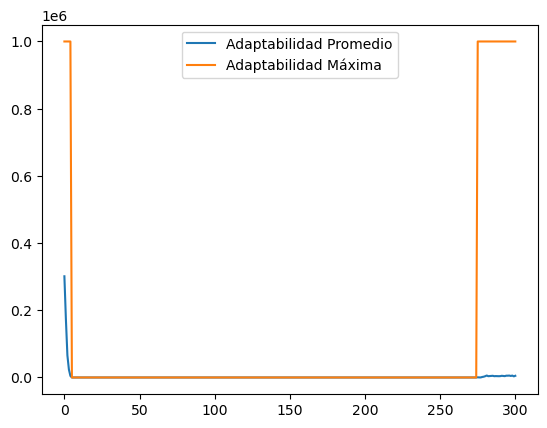

El individuo que presenta el mayor beneficio es: [200, 200, 4389.408815523622, 202]
La adaptabilidad del mejor individuo es: (0.36498514465707893, 0.3630653395586268)


In [46]:
plt.plot(logbook.select('gen'), logbook.select('Promedio'), label = 'Adaptabilidad Promedio')
plt.plot(logbook.select('gen'), logbook.select('Máximo'), label = 'Adaptabilidad Máxima')
plt.legend()
plt.show()
print(f'El individuo que presenta el mayor beneficio es: {tools.selBest(population, 1)[0]}')
print(f'La adaptabilidad del mejor individuo es: {evaluar_portafolio(tools.selBest(population, 1)[0],
                                                                     ret_simple = retorno_simple_diario,
                                                                     ret_logaritmico = retorno_log_diario)}')
